How to apply loadings based on the event size

In [18]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ylt

yelt = pd.read_csv("tests/_data/example_pareto_poisson_yelt.csv",
                    index_col=['Year', 'EventID', 'DayOfYear'])['Loss']
yelt.attrs['n_yrs'] = 1e5

display(yelt.yel.to_rp_summaries([1000, 200, 100, 10], is_ef=False).to_frame().style.format("{:,.0f}"))
display(yelt.yel.to_summary_stats_series().to_frame().style.format("{:,.0f}"))

,Loss
Metric,
AAL,"5,564"
STD,"158,881"


In [19]:
# Specify loading factors based on OEP return period
rp_loadings = np.array([(5, 0.8), (10, 0.9), (50, 1.0), (100, 1.1), (200, 1.0)])

# Map the loading factors into loss using interpolation on return period
oep_curve = yelt.yel.to_ylt(is_occurrence=True).yl.to_ep_curve()
oep_curve['RP'] = 1 / oep_curve['ExProb']
oep_curve['loading'] = np.interp(oep_curve['RP'], rp_loadings[:,0], rp_loadings[:,1])

if not (oep_curve['Loss'] * oep_curve['loading']).is_monotonic_decreasing:
    warnings.warn('The order of events will not be preserved')

oep_curve


/tmp/ipykernel_6829/1360940285.py:10: UserWarning: The order of events will not be preserved
  warnings.warn('The order of events will not be preserved')


,Loss,ExProb,RP,loading
Order,,,,
0,3.628133e+07,0.00001,100000.000000,1.0
1,1.663761e+07,0.00002,50000.000000,1.0
2,1.205647e+07,0.00003,33333.333333,1.0
3,1.079823e+07,0.00004,25000.000000,1.0
4,9.848174e+06,0.00005,20000.000000,1.0
...,...,...,...,...
39242,1.000114e+03,0.39243,2.548225,0.8
39243,1.000091e+03,0.39244,2.548160,0.8
39244,1.000085e+03,0.39245,2.548095,0.8


In [33]:
# Apply to the ylt
oep_curve = oep_curve.sort_values('Loss')

yelt_loaded = yelt.copy().sort_values()
yelt_loaded = yelt_loaded * np.interp(yelt_loaded, oep_curve.Loss, oep_curve.loading)
yelt_loaded

Year   EventID  DayOfYear
35617  26476    233          8.000520e+02
37523  37685    105          8.000681e+02
32213  17253    232          8.000727e+02
50809  38489    5            8.000913e+02
5440   12820    85           8.001261e+02
                                 ...     
51369  29355    224          9.848174e+06
10432  28920    362          1.079823e+07
54662  3586     186          1.205647e+07
79142  11708    90           1.663761e+07
22644  43737    354          3.628133e+07
Name: Loss, Length: 49812, dtype: float64

In [34]:

display(yelt_loaded.yel.to_rp_summaries([1000, 200, 100, 10], is_ef=False).to_frame().style.format("{:,.0f}"))
display(yelt_loaded.yel.to_summary_stats_series().to_frame().style.format("{:,.0f}"))

,Loss
Metric,
AAL,"5,409"
STD,"158,889"


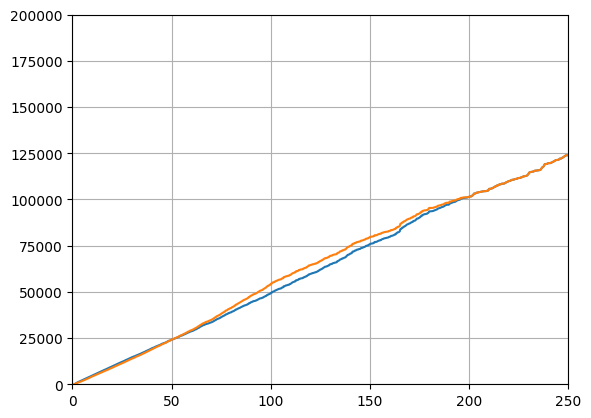

In [24]:
# Make a plot
fig, ax = plt.subplots(1)

ax.plot(oep_curve.RP, oep_curve.Loss)
ax.plot(oep_curve.RP, oep_curve.Loss * oep_curve.loading)

ax.set(xlim=[0, 250], ylim=[0, 2e5])
plt.grid()
plt.show()
